# machine_temperature_system_failure
Temperature sensor data of an internal component of a large, industrial mahcine.

The first anomaly is a planned shutdown of the machine.

The second anomaly is difficult to detect and directly led to the third anomaly, a catastrophic failure of the machine.

Labels are here - 

https://github.com/numenta/NAB/blob/master/labels/combined_labels.json

For this data set - 

* "2013-12-11 06:00:00"
* "2013-12-16 17:25:00"
* "2014-01-28 13:55:00"
* "2014-02-08 14:30:00"

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
import pandas as pd
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%reload_ext autoreload
%autoreload 1
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

display(HTML("<style>.container { width:100% !important; }</style>"))

# Import the relevant libraries
import os
import re
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from Utils.UtilsViz import *
from Utils.DataUtils import *


In [2]:
data = pd.read_csv("./machine_temperature_system_failure.csv")
data.head()

,timestamp,value
0,2013-12-02 21:15:00,73.967322
1,2013-12-02 21:20:00,74.935882
2,2013-12-02 21:25:00,76.124162
3,2013-12-02 21:30:00,78.140707
4,2013-12-02 21:35:00,79.329836


In [3]:
anomaly_points = [
    "2013-12-11 06:00:00",
    "2013-12-16 17:25:00",
    "2014-01-28 13:55:00",
    "2014-02-08 14:30:00"
]
data["anomaly_flag"] = data["timestamp"].apply(lambda x: True if str(x) in anomaly_points else False)

In [4]:
data.shape

(22695, 3)

In [5]:
data["timestamp"] = pd.to_datetime(data['timestamp'])


def get_date_time_columns(data, colname):
    """
    dayofweek - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.dayofweek.html
    """
    
    data["_month"] = 0
    data["_day"] = 0
    data["_year"] = 0
    data["_hour"] = 0
    data["_minute"] = 0
    data["_second"] = 0
    data["_dayofweek"] = 0
    data['_day_of_year'] = 0
    data['_week_of_year'] = 0
    
    def get_dtc(row):
        row["_month"] = row[colname].month
        row["_year"] = row[colname].year
        row["_day"] = row[colname].day
        row["_hour"] = row[colname].hour
        row["_minute"] = row[colname].minute
        row["_second"] = row[colname].second
        row["_dayofweek"] = row[colname].dayofweek
        row['_day_of_year'] = row[colname].dayofyear
        row['_week_of_year'] = row[colname].weekofyear     
        return row
    
    data = data.apply(get_dtc, axis=1)
    
    
    return data

data = get_date_time_columns(data, "timestamp")

In [10]:
data.head()

,timestamp,value,anomaly_flag,_month,_day,_year,_hour,_minute,_second,_dayofweek,_day_of_year,_week_of_year
0,2013-12-02 21:15:00,73.967322,False,12,2,2013,21,15,0,0,336,49
1,2013-12-02 21:20:00,74.935882,False,12,2,2013,21,20,0,0,336,49
2,2013-12-02 21:25:00,76.124162,False,12,2,2013,21,25,0,0,336,49
3,2013-12-02 21:30:00,78.140707,False,12,2,2013,21,30,0,0,336,49
4,2013-12-02 21:35:00,79.329836,False,12,2,2013,21,35,0,0,336,49


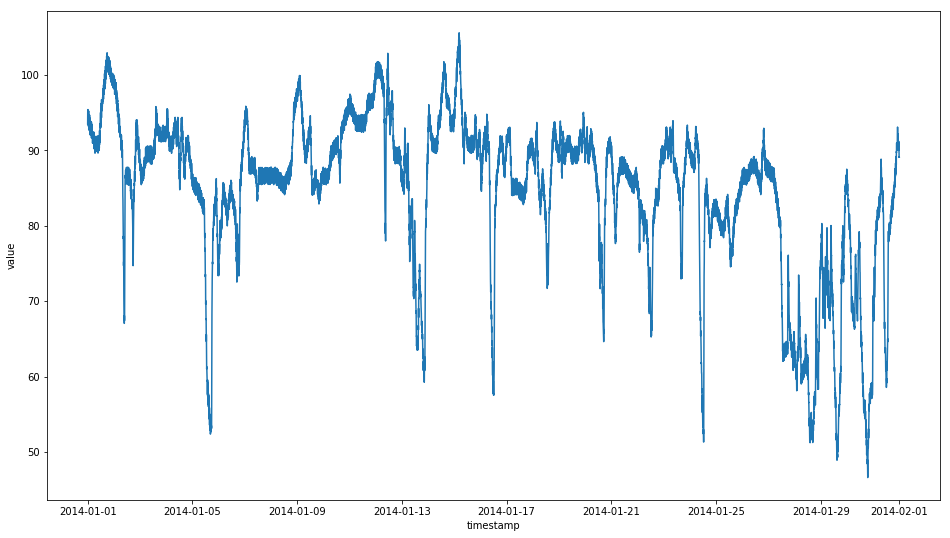

In [19]:
q = "(_month==1)"#" & (_day<=7)"
tmp = data.query(q)
f, ax = plt.subplots(1, 1, figsize=(16,9))
sns.lineplot(x="timestamp", y="value", data=tmp, ax=ax)

In [20]:
tmp["_day"].value_counts()

7     300
31    288
27    288
16    288
24    288
1     288
9     288
17    288
25    288
2     288
10    288
18    288
26    288
3     288
11    288
19    288
4     288
23    288
12    288
20    288
28    288
5     288
13    288
21    288
29    288
6     288
14    288
22    288
30    288
15    288
8     288
Name: _day, dtype: int64

-----------

### Plot the time series

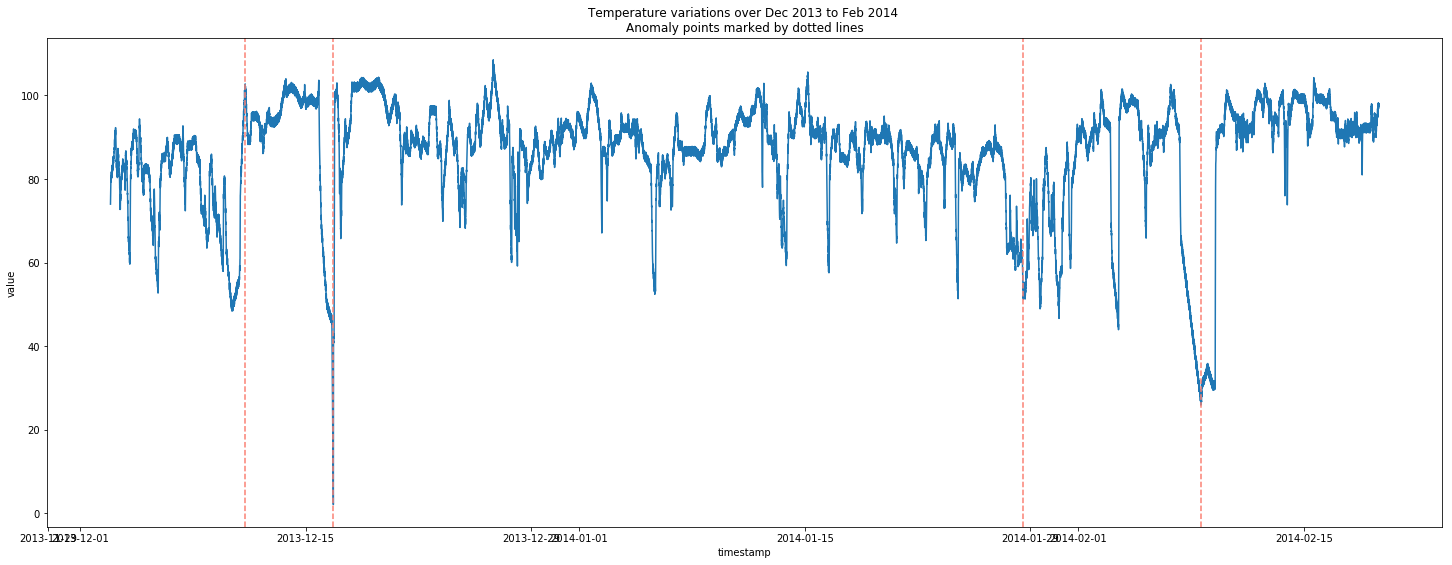

In [6]:
f, ax = plt.subplots(1, 1, figsize=(25, 9))
g = sns.lineplot(x="timestamp", y="value", data=data, ax=ax)
t = g.set(title="Temperature variations over Dec 2013 to Feb 2014 \nAnomaly points marked by dotted lines")
for ap in anomaly_points:
    ax.axvline(ap, linestyle="--", color="salmon")

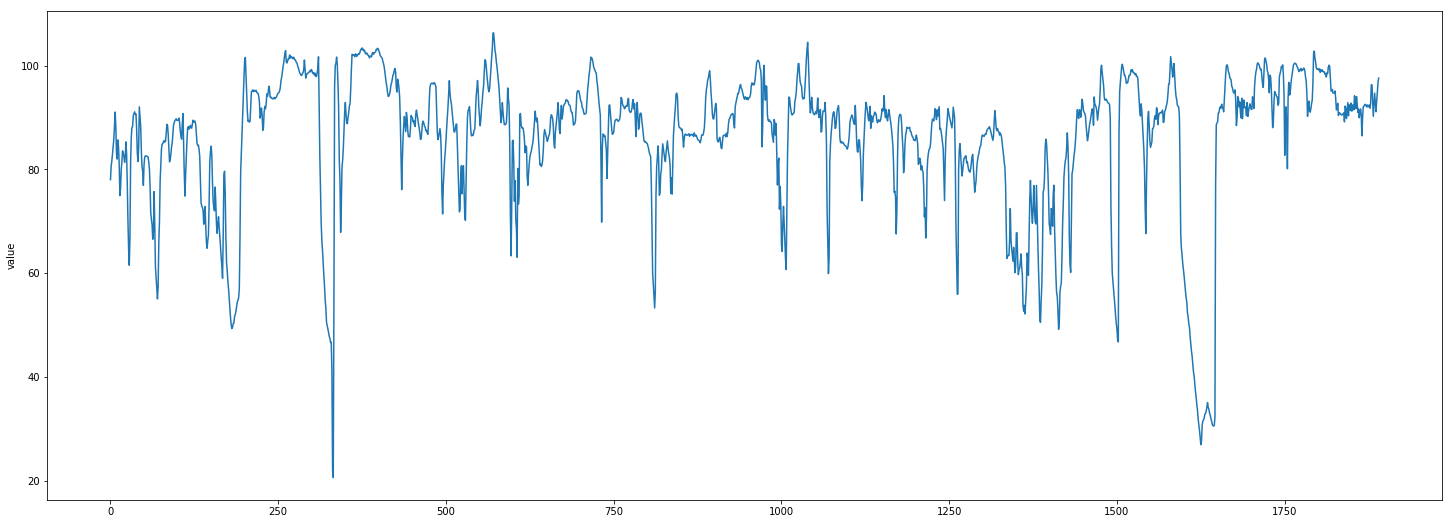

In [7]:
day_grp = data.groupby(by=["_year", "_month", "_day", "_hour"], as_index=False).mean()
f, ax = plt.subplots(1, 1, figsize=(25, 9))
sns.lineplot(x=day_grp.index, y="value", data=day_grp, ax=ax)

##### Todo : Quantify the variation within each hour, possible feature / flag?

 ------------

### Aggregate and plot distributions

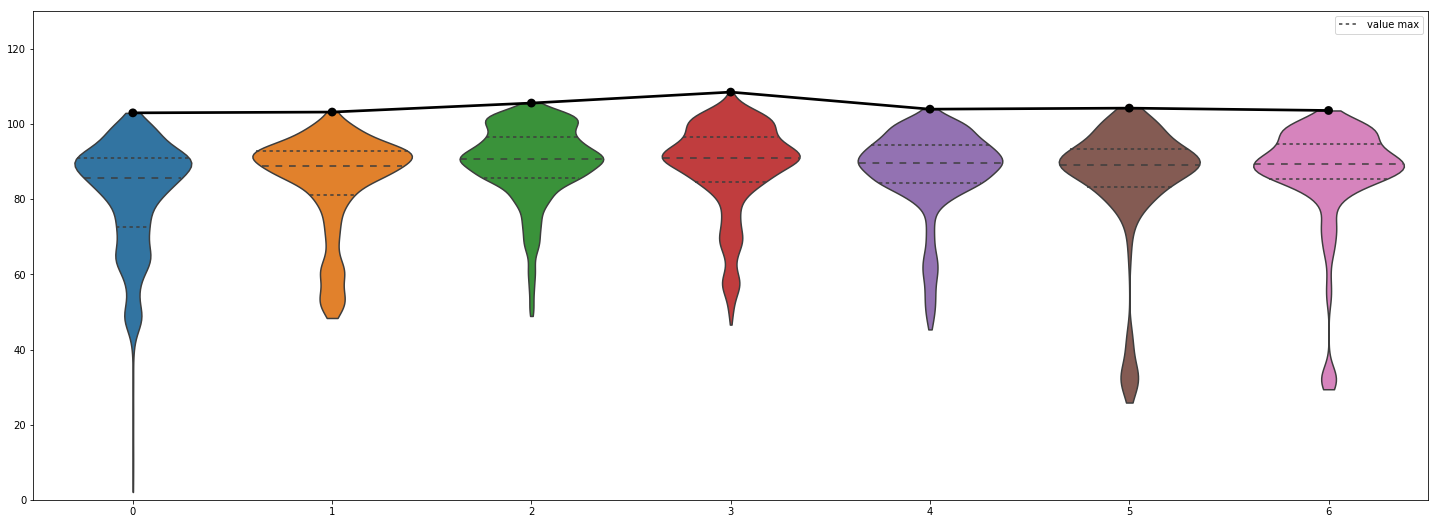

In [8]:
f, ax = plt.subplots(1, 1, figsize=(25, 9))
plot_violin(x="_dayofweek", y="value", data=data, ax=ax, agg_rule="max", cut=0, inner="quartile")

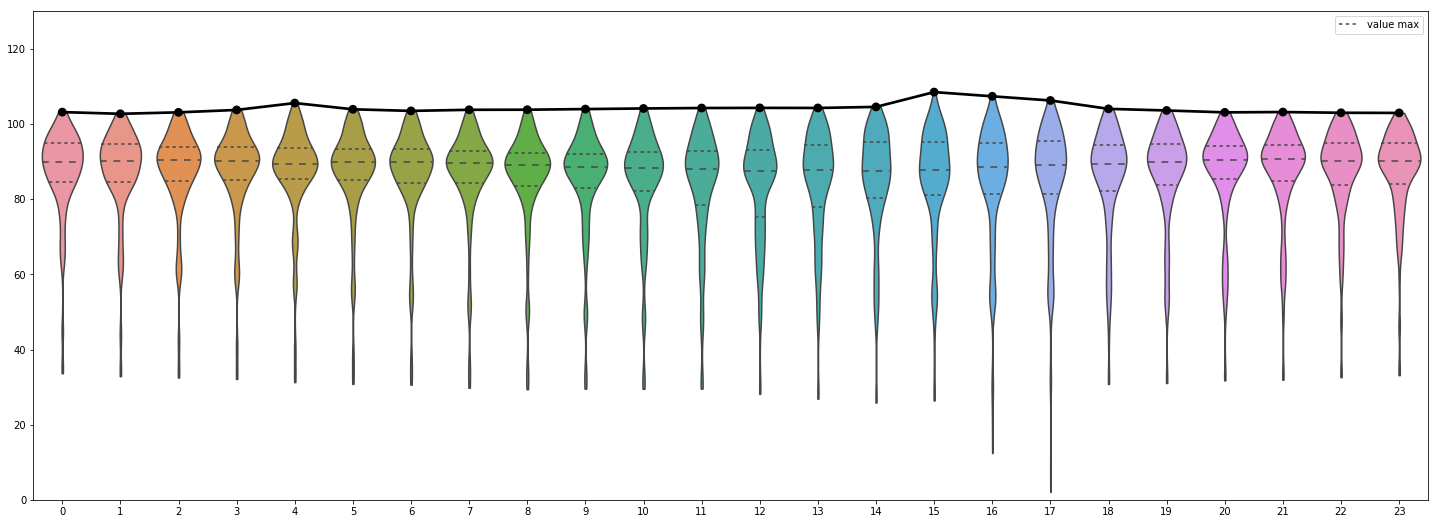

In [9]:
f, ax = plt.subplots(1, 1, figsize=(25, 9))
plot_violin(x="_hour", y="value", data=data, ax=ax, agg_rule="max", cut=0, inner="quartile")